<a href="https://colab.research.google.com/github/joaocarvoli/ML-problems/blob/main/problems/01_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem: Titanic's shipwreck
> You need to predict if a passenger will survive or not. “what sorts of people were more likely to survive?” 

Links:
- [Titanic - Machine Learning from Disaster @Kaggle](https://www.kaggle.com/competitions/titanic)

![](https://cdn.radiofrance.fr/s3/cruiser-production/2021/04/be48c786-c1ca-40e9-9d82-0a24395f0f85/1200x630_gettyimages-517359150.jpg)
[source image](https://cdn.radiofrance.fr/s3/cruiser-production/2021/04/be48c786-c1ca-40e9-9d82-0a24395f0f85/1200x630_gettyimages-517359150.jpg)

# 1 - Imports

In [98]:
# Libraries import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
# Data import
dataframe_train = pd.read_csv('/content/drive/MyDrive/datasets/titanic/train.csv')
dataframe_test = pd.read_csv('/content/drive/MyDrive/datasets/titanic/test.csv')

# 2 - Preprocessing & Data Analisys

In [100]:
# How is Our data?
dataframe_train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [136]:
# Let's drop the name column because it's irrelevant for us
dataframe_train.drop(columns = 'Name', inplace = True)

In [101]:
# What is Our data bounds(shape)?
dataframe_train.shape

(891, 12)

### 2.1 - Null values

In [102]:
# Does We have missing data?
dataframe_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have three columns with missing values, let's know why!

In [103]:
# This column is the age of each passenger
dataframe_train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

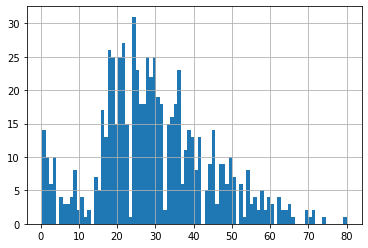

In [104]:
# Age distribuition
dataframe_train['Age'].hist(bins=dataframe_train['Age'].value_counts().count());

In [109]:
# For this column above we will use a metric to input data into NaN values
dataframe_train['Age'].fillna(method = 'bfill', inplace = True) # This method is more preserver of the previous distribution

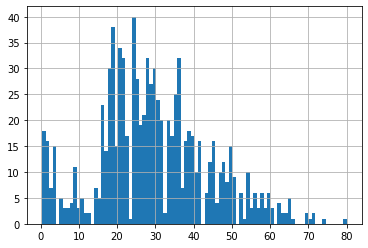

In [106]:
dataframe_train['Age'].hist(bins=dataframe_train['Age'].value_counts().count());

In [107]:
# This column is which cabin a passenger is located
dataframe_train['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [118]:
print(f"We have only {dataframe_train['Cabin'].value_counts().count()} of {dataframe_train.shape[0]} valid values for Cabin column, therefore, values that are not null and are unique")

We have only 147 of 891 valid values for Cabin column, therefore, values that are not null and are unique


In [125]:
# We will discard this column also because its values are insignificant
dataframe_train.drop(columns = 'Cabin', inplace = True)

In [134]:
# We will drop the rows that have at least one missing value, in this case, two rows
dataframe_train.dropna(axis = 'index', inplace = True)

### 2.2 - Categorical columns

In [137]:
dataframe_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 76.4+ KB


In [141]:
dataframe_train['Sex'].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [ ]:
# Let's trasnform this column into two, using one hot encoding


In [142]:
dataframe_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 680, dtype: int64

In [143]:
dataframe_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## `Fonts:`
- [`Tackling Missing Value in Dataset` *@analyticsvidhya*](https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/)
- [`Why One-Hot Encode Data in Machine Learning?` *@machinelearningmastery*](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/)